In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math

from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [3]:
er_cas_100_data = pd.read_csv('proc_er_cas_100.csv')

del er_cas_100_data['Unnamed: 0']

In [4]:
er_500_50_0012 = pd.read_csv('proc_er_500_50_0012.csv')

del er_500_50_0012['Unnamed: 0']

In [5]:
er_1000_50_0006 = pd.read_csv('proc_er_1000_50_0006.csv')

del er_1000_50_0006['Unnamed: 0']

In [6]:
er_1500_50_0004 = pd.read_csv('proc_er_1500_50_0004.csv')

del er_1500_50_0004['Unnamed: 0']

In [7]:
er_cas_100_data

,rep,attack_size,t,init_intra_edge_a,init_intra_edge_b,init_supp_edge,fin_intra_edge_a,fin_intra_edge_b,fin_supp_edge,init_mean_deg_a,...,step52_isol,step52_unsupp,step53_isol,step53_unsupp,step54_isol,step54_unsupp,step55_isol,step55_unsupp,step56_isol,step56_unsupp
0,1,100,0.005887,734,734,1000,0,0,0.0,2.936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,100,0.005887,734,734,1000,200,217,188.0,2.936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,100,0.005887,734,734,1000,0,0,0.0,2.936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,100,0.005887,734,734,1000,339,322,274.0,2.936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,100,0.005887,734,734,1000,218,208,194.0,2.936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,100,0.006283,784,784,1000,365,355,286.0,3.136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,2997,100,0.006283,784,784,1000,391,404,313.0,3.136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2997,2998,100,0.006283,784,784,1000,305,301,260.0,3.136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,2999,100,0.006283,784,784,1000,291,285,248.0,3.136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
er_500_50_0012

,rep,attack_size,t,init_intra_edge_a,init_intra_edge_b,init_supp_edge,fin_intra_edge_a,fin_intra_edge_b,fin_supp_edge,init_mean_deg_a,...,step56_isol,step56_unsupp,step57_isol,step57_unsupp,step58_isol,step58_unsupp,step59_isol,step59_unsupp,step60_isol,step60_unsupp
0,1,100,0.005511,687,687,1000,0,0,0,2.748,...,0,0,0,0,0,0,0,0,0,0
1,2,100,0.005511,687,687,1000,0,0,0,2.748,...,0,0,0,0,0,0,0,0,0,0
2,3,100,0.005511,687,687,1000,0,0,0,2.748,...,0,0,0,0,0,0,0,0,0,0
3,4,100,0.005511,687,687,1000,1,1,2,2.748,...,0,0,0,0,0,0,0,0,0,0
4,5,100,0.005511,687,687,1000,0,0,0,2.748,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,100,0.006699,807,807,1000,416,410,313,3.344,...,0,0,0,0,0,0,0,0,0,0
4996,4997,100,0.006699,807,807,1000,325,362,275,3.344,...,0,0,0,0,0,0,0,0,0,0
4997,4998,100,0.006699,807,807,1000,437,439,327,3.344,...,0,0,0,0,0,0,0,0,0,0
4998,4999,100,0.006699,807,807,1000,442,438,325,3.344,...,0,0,0,0,0,0,0,0,0,0


In [9]:
er_1000_50_0006

,rep,attack_size,t,init_intra_edge_a,init_intra_edge_b,init_supp_edge,fin_intra_edge_a,fin_intra_edge_b,fin_supp_edge,init_mean_deg_a,...,step67_isol,step67_unsupp,step68_isol,step68_unsupp,step69_isol,step69_unsupp,step70_isol,step70_unsupp,step71_isol,step71_unsupp
0,1,200,0.002752,1375,1375,2000,0,0,0,2.750,...,0,0,0,0,0,0,0,0,0,0
1,2,200,0.002752,1375,1375,2000,0,0,0,2.750,...,0,0,0,0,0,0,0,0,0,0
2,3,200,0.002752,1375,1375,2000,0,0,0,2.750,...,0,0,0,0,0,0,0,0,0,0
3,4,200,0.002752,1375,1375,2000,0,0,0,2.750,...,0,0,0,0,0,0,0,0,0,0
4,5,200,0.002752,1375,1375,2000,0,0,0,2.750,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,200,0.003346,1671,1671,2000,835,848,624,3.342,...,0,0,0,0,0,0,0,0,0,0
4996,4997,200,0.003346,1671,1671,2000,773,746,585,3.342,...,0,0,0,0,0,0,0,0,0,0
4997,4998,200,0.003346,1671,1671,2000,817,799,610,3.342,...,0,0,0,0,0,0,0,0,0,0
4998,4999,200,0.003346,1671,1671,2000,797,822,609,3.342,...,0,0,0,0,0,0,0,0,0,0


In [10]:
er_1500_50_0004

,rep,attack_size,t,init_intra_edge_a,init_intra_edge_b,init_supp_edge,fin_intra_edge_a,fin_intra_edge_b,fin_supp_edge,init_mean_deg_a,...,step61_isol,step61_unsupp,step62_isol,step62_unsupp,step63_isol,step63_unsupp,step64_isol,step64_unsupp,step65_isol,step65_unsupp
0,1,300,0.001834,2062,2062,3000,0,0,0,2.749333,...,0,0,0,0,0,0,0,0,0,0
1,2,300,0.001834,2062,2062,3000,0,0,0,2.749333,...,0,0,0,0,0,0,0,0,0,0
2,3,300,0.001834,2062,2062,3000,0,0,0,2.749333,...,0,0,0,0,0,0,0,0,0,0
3,4,300,0.001834,2062,2062,3000,0,0,0,2.749333,...,0,0,0,0,0,0,0,0,0,0
4,5,300,0.001834,2062,2062,3000,0,0,0,2.749333,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,300,0.002230,2507,2507,3000,1144,1145,885,3.342667,...,0,0,0,0,0,0,0,0,0,0
4996,4997,300,0.002230,2507,2507,3000,1088,1082,847,3.342667,...,0,0,0,0,0,0,0,0,0,0
4997,4998,300,0.002230,2507,2507,3000,1129,1085,855,3.342667,...,0,0,0,0,0,0,0,0,0,0
4998,4999,300,0.002230,2507,2507,3000,1175,1167,889,3.342667,...,0,0,0,0,0,0,0,0,0,0


In [11]:
er_cas_100_dict = {}

for i in range(100):
    target = list(range(i*30, (i+1)*30))
    
    temp_er_cas_100 = er_cas_100_data[i*30 + 0 : (i+1)*30]
    
    alive = 0
    for index in target:
        if (temp_er_cas_100['alive_nodes'][index] != 0) and (temp_er_cas_100['fin_larg_comp_a'][index] != 0):
            alive += 1
        p_k = 0.8 * 499 * temp_er_cas_100['t'][index]
    
    if i == 0:
        er_cas_100_dict['attack_size'] = [statistics.mean(temp_er_cas_100['attack_size'].values.tolist())]
        er_cas_100_dict['t'] = [statistics.mean(temp_er_cas_100['t'].values.tolist())]
        er_cas_100_dict['init_intra_edge_a'] = [statistics.mean(temp_er_cas_100['init_intra_edge_a'].values.tolist())]
        er_cas_100_dict['alive ratio'] = [alive / 30]
        er_cas_100_dict['p<k>'] = [p_k]
    else:
        er_cas_100_dict['attack_size'].append(statistics.mean(temp_er_cas_100['attack_size'].values.tolist()))
        er_cas_100_dict['t'].append(statistics.mean(temp_er_cas_100['t'].values.tolist()))
        er_cas_100_dict['init_intra_edge_a'].append(statistics.mean(temp_er_cas_100['init_intra_edge_a'].values.tolist()))
        er_cas_100_dict['alive ratio'].append(alive / 30)
        er_cas_100_dict['p<k>'].append(p_k)

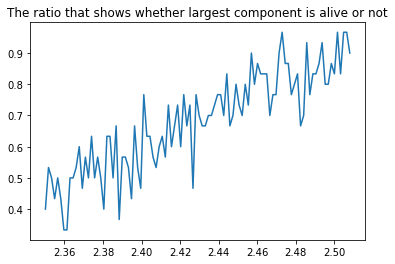

In [13]:
plt.plot(er_cas_100_dict['p<k>'], er_cas_100_dict['alive ratio'])
plt.title('The ratio that shows whether largest component is alive or not')
plt.show()

In [14]:
er_500_50_0012_dict = {}

for i in range(100):
    target = list(range(i*50, (i+1)*50))
    
    temp_er_500_50_0012 = er_500_50_0012[i*50 + 0 : (i+1)*50]
    
    alive = 0
    for index in target:
        if (temp_er_500_50_0012['alive_nodes'][index] != 0) and (temp_er_500_50_0012['fin_larg_comp_a'][index] != 0):
            alive += 1
        p_k = 0.8 * 499 * temp_er_500_50_0012['t'][index]
    
    if i == 0:
        er_500_50_0012_dict['attack_size'] = [statistics.mean(temp_er_500_50_0012['attack_size'].values.tolist())]
        er_500_50_0012_dict['t'] = [statistics.mean(temp_er_500_50_0012['t'].values.tolist())]
        er_500_50_0012_dict['init_intra_edge_a'] = [statistics.mean(temp_er_500_50_0012['init_intra_edge_a'].values.tolist())]
        er_500_50_0012_dict['alive ratio'] = [alive / 50]
        er_500_50_0012_dict['p<k>'] = [p_k]
        er_500_50_0012_dict['alive_nodes'] = [statistics.mean(temp_er_cas_100['alive_nodes'].values.tolist())]
    else:
        er_500_50_0012_dict['attack_size'].append(statistics.mean(temp_er_500_50_0012['attack_size'].values.tolist()))
        er_500_50_0012_dict['t'].append(statistics.mean(temp_er_500_50_0012['t'].values.tolist()))
        er_500_50_0012_dict['init_intra_edge_a'].append(statistics.mean(temp_er_500_50_0012['init_intra_edge_a'].values.tolist()))
        er_500_50_0012_dict['alive ratio'].append(alive / 50)
        er_500_50_0012_dict['p<k>'].append(p_k)
        er_500_50_0012_dict['alive_nodes'].append(statistics.mean(temp_er_cas_100['alive_nodes'].values.tolist()))

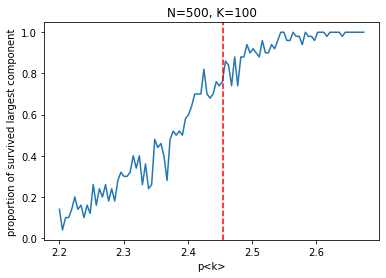

In [25]:
plt.plot(er_500_50_0012_dict['p<k>'], er_500_50_0012_dict['alive ratio'])
plt.axvline(x=2.4554, color='r', linestyle='--')
plt.title('N=500, K=100')
plt.xlabel("p<k>")
plt.ylabel("proportion of survived largest component")
plt.savefig("er_n500_k100")
plt.show()

In [16]:
X = er_500_50_0012_dict['p<k>']
Y = er_500_50_0012_dict['log_reg_p<k>']

KeyError: 'log_reg_p<k>'

In [128]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(Y), np.median(X),1,min(Y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, X, Y,p0, method='dogbox')

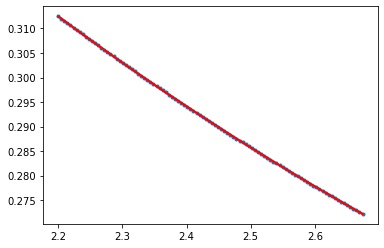

In [131]:
plt.scatter(X, Y, marker='.')
plt.plot(X, Y, linewidth=2)
plt.plot(X, sigmoid(X, *popt), color='red', linewidth=2)
plt.show()

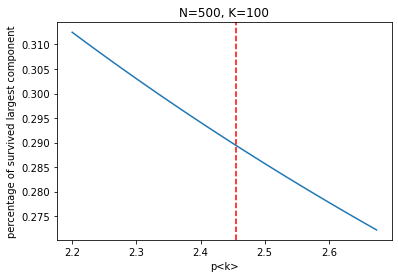

In [113]:
plt.plot(er_500_50_0012_dict['p<k>'], er_500_50_0012_dict['log_reg_p<k>'])
plt.axvline(x=2.4554, color='r', linestyle='--')
plt.title('N=500, K=100')
plt.xlabel("p<k>")
plt.ylabel("percentage of survived largest component")
plt.savefig("er_n500_k100")
plt.show()

In [17]:
er_1000_50_0006_dict = {}

for i in range(100):
    target = list(range(i*50, (i+1)*50))
    
    temp_er_1000_50_0006 = er_1000_50_0006[i*50 + 0 : (i+1)*50]
    
    alive = 0
    for index in target:
        if (temp_er_1000_50_0006['alive_nodes'][index] != 0) and (temp_er_1000_50_0006['fin_larg_comp_a'][index] != 0):
            alive += 1
        p_k = 0.8 * 999 * temp_er_1000_50_0006['t'][index]
    
    if i == 0:
        er_1000_50_0006_dict['attack_size'] = [statistics.mean(temp_er_1000_50_0006['attack_size'].values.tolist())]
        er_1000_50_0006_dict['t'] = [statistics.mean(temp_er_1000_50_0006['t'].values.tolist())]
        er_1000_50_0006_dict['init_intra_edge_a'] = [statistics.mean(temp_er_1000_50_0006['init_intra_edge_a'].values.tolist())]
        er_1000_50_0006_dict['alive ratio'] = [alive / 50]
        er_1000_50_0006_dict['p<k>'] = [p_k]
    else:
        er_1000_50_0006_dict['attack_size'].append(statistics.mean(temp_er_1000_50_0006['attack_size'].values.tolist()))
        er_1000_50_0006_dict['t'].append(statistics.mean(temp_er_1000_50_0006['t'].values.tolist()))
        er_1000_50_0006_dict['init_intra_edge_a'].append(statistics.mean(temp_er_1000_50_0006['init_intra_edge_a'].values.tolist()))
        er_1000_50_0006_dict['alive ratio'].append(alive / 50)
        er_1000_50_0006_dict['p<k>'].append(p_k)

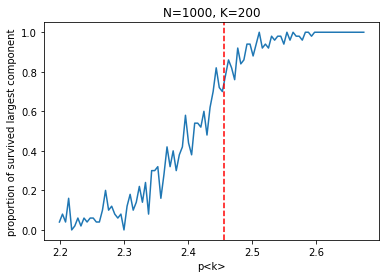

In [26]:
plt.plot(er_1000_50_0006_dict['p<k>'], er_1000_50_0006_dict['alive ratio'])
plt.axvline(x=2.4554, color='r', linestyle='--')
plt.title('N=1000, K=200')
plt.xlabel("p<k>")
plt.ylabel("proportion of survived largest component")
plt.savefig("er_n1000_k200")
plt.show()

In [19]:
er_1500_50_0004_dict = {}

for i in range(100):
    target = list(range(i*50, (i+1)*50))
    
    temp_er_1500_50_0004 = er_1500_50_0004[i*50 + 0 : (i+1)*50]
    
    alive = 0
    for index in target:
        if (temp_er_1500_50_0004['alive_nodes'][index] != 0) and (temp_er_1500_50_0004['fin_larg_comp_a'][index] != 0):
            alive += 1
        p_k = 0.8 * 1499 * temp_er_1500_50_0004['t'][index]
    
    if i == 0:
        er_1500_50_0004_dict['attack_size'] = [statistics.mean(temp_er_1500_50_0004['attack_size'].values.tolist())]
        er_1500_50_0004_dict['t'] = [statistics.mean(temp_er_1500_50_0004['t'].values.tolist())]
        er_1500_50_0004_dict['init_intra_edge_a'] = [statistics.mean(temp_er_1500_50_0004['init_intra_edge_a'].values.tolist())]
        er_1500_50_0004_dict['alive ratio'] = [alive / 50]
        er_1500_50_0004_dict['p<k>'] = [p_k]
    else:
        er_1500_50_0004_dict['attack_size'].append(statistics.mean(temp_er_1500_50_0004['attack_size'].values.tolist()))
        er_1500_50_0004_dict['t'].append(statistics.mean(temp_er_1500_50_0004['t'].values.tolist()))
        er_1500_50_0004_dict['init_intra_edge_a'].append(statistics.mean(temp_er_1500_50_0004['init_intra_edge_a'].values.tolist()))
        er_1500_50_0004_dict['alive ratio'].append(alive / 50)
        er_1500_50_0004_dict['p<k>'].append(p_k)

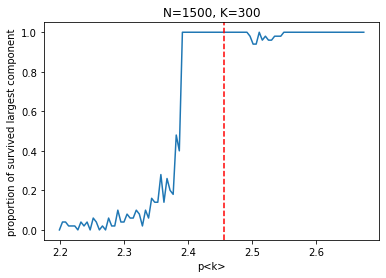

In [27]:
plt.plot(er_1500_50_0004_dict['p<k>'], er_1500_50_0004_dict['alive ratio'])
plt.axvline(x=2.4554, color='r', linestyle='--')
plt.title('N=1500, K=300')
plt.xlabel("p<k>")
plt.ylabel("proportion of survived largest component")
plt.savefig("er_n1500_k300")
plt.show()

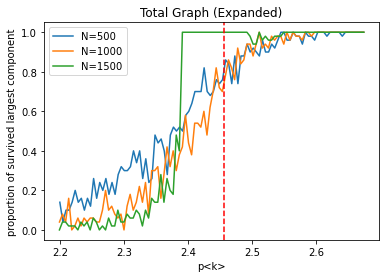

In [30]:
plt.plot(er_500_50_0012_dict['p<k>'], er_500_50_0012_dict['alive ratio'])
plt.plot(er_1000_50_0006_dict['p<k>'], er_1000_50_0006_dict['alive ratio'])
plt.plot(er_1500_50_0004_dict['p<k>'], er_1500_50_0004_dict['alive ratio'])
plt.axvline(x=2.4554, color='r', linestyle='--')
plt.title('Total Graph (Expanded)')
plt.xlabel("p<k>")
plt.ylabel("proportion of survived largest component")
plt.legend(['N=500', 'N=1000', 'N=1500'])
plt.savefig("er_total_expanded")
plt.show()

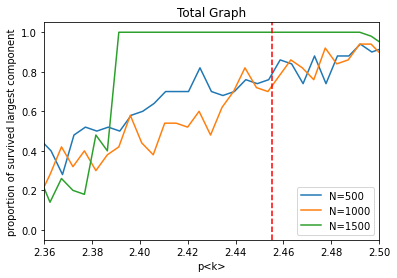

In [29]:
plt.plot(er_500_50_0012_dict['p<k>'], er_500_50_0012_dict['alive ratio'])
plt.plot(er_1000_50_0006_dict['p<k>'], er_1000_50_0006_dict['alive ratio'])
plt.plot(er_1500_50_0004_dict['p<k>'], er_1500_50_0004_dict['alive ratio'])
plt.axvline(x=2.4554, color='r', linestyle='--')
plt.title('Total Graph')
plt.xlabel("p<k>")
plt.ylabel("proportion of survived largest component")
plt.legend(['N=500', 'N=1000', 'N=1500'])
plt.xlim([2.36, 2.5])
plt.savefig("er_total")
plt.show()